This notebook was prepared by Cayetano Benavent, 2016.

# Vector analysis with Shapely

In [1]:
import shapely

Create point data:

In [2]:
from shapely.geometry import Point

In [3]:
pt = Point(5.5, 10.5)

In [4]:
pt.wkt

'POINT (5.5 10.5)'

Computing vector analysis operations:

In [5]:
buff = pt.buffer(10.0)

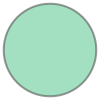

In [6]:
buff

In [7]:
buff.geom_type

'Polygon'

In [8]:
buff.wkt

'POLYGON ((15.5 10.5, 15.45184726672197 9.519828596704395, 15.30785280403231 8.549096779838719, 15.06940335732209 7.597153227455379, 14.73879532511287 6.673165676349106, 14.31921264348355 5.786032631740028, 13.81469612302546 4.944297669803983, 13.23010453362737 4.156067158363551, 12.57106781186548 3.428932188134531, 11.84393284163646 2.769895466372637, 11.05570233019603 2.185303876974553, 10.21396736825999 1.680787356516454, 9.326834323650909 1.261204674887138, 8.402846772544637 0.9305966426779158, 7.450903220161297 0.6921471959676975, 6.480171403295621 0.5481527332780338, 5.500000000000016 0.5, 4.519828596704411 0.5481527332780303, 3.549096779838735 0.6921471959676921, 2.597153227455395 0.9305966426779069, 1.673165676349122 1.261204674887125, 0.786032631740043 1.68078735651644, -0.0557023301960049 2.185303876974537, -0.8439328416364393 2.769895466372618, -1.571067811865462 3.428932188134512, -2.230104533627359 4.156067158363532, -2.814696123025444 4.944297669803964, -3.319212643483542

In [9]:
buff.area

313.6548490545939

In [10]:
pt2 = Point(8.5, 15.5)

In [11]:
buff2 = pt2.buffer(10.0)

In [12]:
buff2.intersects(buff)

True

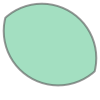

In [13]:
buff2.intersection(buff)

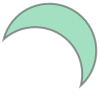

In [14]:
buff2.difference(buff)

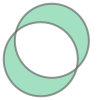

In [15]:
buff2.symmetric_difference(buff)

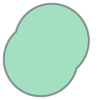

In [16]:
buff2.union(buff)

In [17]:
from shapely.geometry import LineString

In [18]:
line = LineString([(0, 1), (10, 14)])

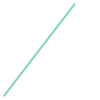

In [19]:
line

In [20]:
line.distance(pt)

1.4328202879967773

In [21]:
ln_buff = line.buffer(5)

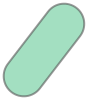

In [22]:
ln_buff

## Fiona and Shapely

Convert Fiona geometry model to Shapely geometry model:

In [46]:
import fiona
from shapely.geometry import shape, mapping

with fiona.open("../../data/clima/mf06_clima.shp", 'r') as in_ds:
    ft = next(in_ds)
    geom_fio = ft['geometry']
    geom_shap = shape(ft['geometry'])
    print(in_ds.schema)

{'geometry': 'Polygon', 'properties': OrderedDict([('TIPO_CLIM', 'str:40'), ('COD_ENT', 'str:4')])}


In [37]:
geom_fio

{'coordinates': [[(259847.80117593426, 4048354.8106294423),
   (255129.01120000053, 4050692.185700001),
   (253578.2961000027, 4061413.767500004),
   (244620.17640000116, 4071119.332200002),
   (236918.8450429095, 4079607.4005027767),
   (236918.8450429095, 4092290.4266840573),
   (235455.41894506942, 4103997.8354667835),
   (236431.0363436304, 4120095.522543026),
   (229093.74529999867, 4129225.901300002),
   (211070.94689999986, 4129321.7255000025),
   (200333.19259690307, 4132290.740025025),
   (193145.23890000023, 4133672.8347999994),
   (176918.37503146008, 4135217.592220705),
   (174234.64540000353, 4140875.3909000065),
   (168954.35790000204, 4142679.7830000054),
   (160120.34646494314, 4152070.8216915466),
   (149485.24830000103, 4155228.6174999997),
   (142771.7660818547, 4147900.6184019856),
   (140991.6928000031, 4159462.1736000013),
   (148399.75730000157, 4167195.5944000036),
   (156918.21836097818, 4174730.0968623925),
   (164104.82120000385, 4177721.6915000044),
   (1626

In [39]:
geom_shap.wkt

'POLYGON ((259847.8011759343 4048354.810629442, 255129.0112000005 4050692.185700001, 253578.2961000027 4061413.767500004, 244620.1764000012 4071119.332200002, 236918.8450429095 4079607.400502777, 236918.8450429095 4092290.426684057, 235455.4189450694 4103997.835466783, 236431.0363436304 4120095.522543026, 229093.7452999987 4129225.901300002, 211070.9468999999 4129321.725500003, 200333.1925969031 4132290.740025025, 193145.2389000002 4133672.834799999, 176918.3750314601 4135217.592220705, 174234.6454000035 4140875.390900007, 168954.357900002 4142679.783000005, 160120.3464649431 4152070.821691547, 149485.248300001 4155228.6175, 142771.7660818547 4147900.618401986, 140991.6928000031 4159462.173600001, 148399.7573000016 4167195.594400004, 156918.2183609782 4174730.096862393, 164104.8212000038 4177721.691500004, 162615.1901000021 4171296.033600003, 170578.7733307909 4167649.964078024, 175942.7576328991 4164973.922876792, 186621.3776000049 4166053.609999998, 195455.1056041038 4165461.73157606

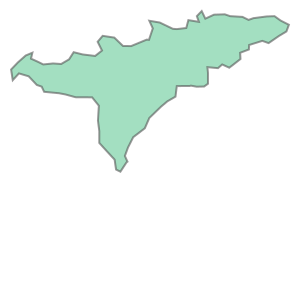

In [38]:
geom_shap

In [41]:
buff_shap = geom_shap.buffer(10000)

Convert to Fiona geometry:

In [44]:
mapping(buff_shap)

{'coordinates': (((174070.36493349457, 4177049.636751387),
   (174741.6345384387, 4176742.300772508),
   (175042.96558705642, 4176598.2034299355),
   (177816.76283141025, 4175214.3821337325),
   (185615.4326159084, 4176002.885083589),
   (186452.07160868088, 4176052.176671341),
   (187289.89979736507, 4176031.238880229),
   (193037.18839255456, 4175646.15841205),
   (196939.9865156796, 4177949.1420717677),
   (200587.33220494603, 4183671.929310968),
   (201141.07204447858, 4184455.166557949),
   (201767.30706609576, 4185181.7462801025),
   (202460.27535403857, 4185844.9833017243),
   (203213.60098750904, 4186438.775255948),
   (204020.35270477744, 4186957.658731912),
   (204873.1076769172, 4187396.859542971),
   (205764.0198043923, 4187752.336653432),
   (206684.89190810878, 4188020.8193596555),
   (207627.251150708, 4188199.837383418),
   (208582.42699416014, 4188287.743600659),
   (209541.63097637828, 4188283.7291964744),
   (210496.0375728382, 4188187.8311069324),
   (211436.8653992

In [45]:
ft

{'geometry': {'coordinates': [[(259847.80117593426, 4048354.8106294423),
    (255129.01120000053, 4050692.185700001),
    (253578.2961000027, 4061413.767500004),
    (244620.17640000116, 4071119.332200002),
    (236918.8450429095, 4079607.4005027767),
    (236918.8450429095, 4092290.4266840573),
    (235455.41894506942, 4103997.8354667835),
    (236431.0363436304, 4120095.522543026),
    (229093.74529999867, 4129225.901300002),
    (211070.94689999986, 4129321.7255000025),
    (200333.19259690307, 4132290.740025025),
    (193145.23890000023, 4133672.8347999994),
    (176918.37503146008, 4135217.592220705),
    (174234.64540000353, 4140875.3909000065),
    (168954.35790000204, 4142679.7830000054),
    (160120.34646494314, 4152070.8216915466),
    (149485.24830000103, 4155228.6174999997),
    (142771.7660818547, 4147900.6184019856),
    (140991.6928000031, 4159462.1736000013),
    (148399.75730000157, 4167195.5944000036),
    (156918.21836097818, 4174730.0968623925),
    (164104.82120000